In [1]:
# !pip install -r ../../prosodic/requirements.txt
import sys
sys.path.insert(0,'..')
from generative_formalism import *

In [2]:
df_dolma = get_rhyme_for_sample('../data/corpus_found_dolma.csv.gz')
df_dolma

,txt,count,found,id_hash,period_meta,subcorpus,author,author_dob,title,year,...,num_rhyming_lines,num_perfectly_rhyming_lines,num_lines_prosodic,perc_rhyming_lines,perc_perfectly_rhyming_lines,num_rhyming_lines_per10l,num_perfectly_rhyming_lines_per10l,rhyme_bool,rhyme_pred,rhyme_pred_perc
id,,,,,,,,,,,,,,,,,,,,,
c20-american/am20114/Z300221220,Tambourines!\nTambourines!\nTambourines\nTo th...,219,True,999655,1900-1999 Twentieth-Century,American Poetry,"Hughes, Langston, 1902-1967.",1902.0,Tambourines,1932,...,0,0,14,0.000000,0.000000,0,0,None,False,0
english/wattsisa/Z400522989,When I survey the wondrous cross\nOn which the...,99,True,515246,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,HYMN 7. (L. M.) Crucifixion to the World by th...,1704,...,20,16,20,100.000000,80.000000,10,8,True,True,100
english-ed2/miscell3/Z300440750,"Go, lovely Rose!\nTell her, that wastes her ti...",97,True,218382,1550-1900 Miscellanies and Collections,English Poetry,"Waller, Edmund, 1606-1687",1606.0,"CXV [Go, lovely Rose!]",1636,...,20,14,20,100.000000,70.000000,10,7,True,True,100
c20-american/am20114/Z300220672,"I must say\nYes, sir,\nTo you all the time.\nY...",60,True,427210,1900-1999 Twentieth-Century,American Poetry,"Hughes, Langston, 1902-1967.",1902.0,Porter,1932,...,6,2,13,46.153846,15.384615,5,2,None,False,0
english/wattsisa/Z400522722,Come let us join our cheerful songs\n With ...,31,True,325150,1750-1799 Later Eighteenth-Century,English Poetry,"Watts, Isaac, 1674-1748",1674.0,"HYMN 62. (C. M.) Christ Jesus, the Lamb of God...",1704,...,17,8,20,85.000000,40.000000,8,4,True,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c20-african-american/da20096/Z200331275,Off go the crows from the roof.\nThe crows can...,0,False,673433,1900-1999 Twentieth-Century,African-American Poetry,"Eady, Cornelius, 1954-",1954.0,CROWS IN A STRONG WIND,1984,...,2,0,16,12.500000,0.000000,1,0,None,False,0
c20-american/am30242/Z300570450,The trees in clouds of November missed\nStandi...,0,False,154819,1900-1999 Twentieth-Century,American Poetry,"Kinnell, Galway, 1927-",1927.0,EARTH&hyphen;SPARROW,1957,...,9,0,15,60.000000,0.000000,6,0,None,False,0
english/priormat/Z300465735,"Haste my Nannette, my lovely maid,\nHaste to t...",0,False,533684,1700-1749 Early Eighteenth-Century,English Poetry,"Prior, Matthew, 1664-1721",1664.0,Nannette. A Song.,1694,...,12,10,14,85.714286,71.428571,9,7,True,True,100


In [3]:
df_closed = get_rhyme_for_completed_poems(filter_line_sim=False)
df_closed = df_closed[~df_closed.model.isin({'Olmo',HIST})]
df_closed['found'] = df_closed['line_sim'] > 95
df_closed.model.value_counts()

100%|██████████| 22458/22458 [00:07<00:00, 3025.16it/s]


model
Llama       3092
DeepSeek    1206
Claude      1005
ChatGPT      832
Name: count, dtype: int64

In [4]:
df_antoniak = get_rhyme_for_sample('../data/antoniak_et_al_memorization_results.csv.gz')
df_antoniak_open = df_antoniak.copy()
df_antoniak_closed = df_antoniak.copy()
df_antoniak_open['found'] = df_antoniak_open['found_open']
df_antoniak_closed['found'] = df_antoniak_closed['found_closed']

In [5]:
LAB_CLOSED = 'Memorized by closed models (Chadwyck-Healey + ChatGPT, Claude, DeepSeek, Llama)'
LAB_OPEN = 'Found in open model training data (Chadwyck-Healey + Dolma)'
LAB_ANTONIAK_CLOSED = '[Antoniak et al] Memorized by closed models (Poetry Foundation/Academy of American Poets + ChatGPT)'
LAB_ANTONIAK_OPEN = '[Antoniak et al] Found in open model training data (Poetry Foundation/Academy of American Poets + Dolma)'

df_combined = pd.concat([
    df_closed.assign(found_source=LAB_CLOSED),
    df_dolma.assign(found_source=LAB_OPEN),
    df_antoniak_closed.assign(found_source=LAB_ANTONIAK_CLOSED),
    df_antoniak_open.assign(found_source=LAB_ANTONIAK_OPEN),
])
df_combined.groupby(['found_source', 'found']).size()

found_source                                                                                              found
Found in open model training data (Chadwyck-Healey + Dolma)                                               False    4229
                                                                                                          True      406
Memorized by closed models (Chadwyck-Healey + ChatGPT, Claude, DeepSeek, Llama)                           False    6038
                                                                                                          True       97
[Antoniak et al] Found in open model training data (Poetry Foundation/Academy of American Poets + Dolma)  False    1369
                                                                                                          True     1380
[Antoniak et al] Memorized by closed models (Poetry Foundation/Academy of American Poets + ChatGPT)       False     808
                                                

In [6]:
figdf = get_avgs_df(df_combined, ['found_source', 'found'])
figdf['found_source'] = pd.Categorical(figdf['found_source'], categories=[LAB_OPEN, LAB_CLOSED, LAB_ANTONIAK_OPEN, LAB_ANTONIAK_CLOSED])
figdf['found'] = figdf['found'].map({True:'Found', False:'Not found'})
figdf['found'] = pd.Categorical(figdf['found'], categories=['Not found','Found'])
figdf

,found_source,found,mean,stderr,count
0,Found in open model training data (Chadwyck-He...,Not found,71.813668,0.691919,4229
1,Found in open model training data (Chadwyck-He...,Found,72.906404,2.208456,406
2,Memorized by closed models (Chadwyck-Healey + ...,Not found,81.086452,0.504023,6038
3,Memorized by closed models (Chadwyck-Healey + ...,Found,76.288660,4.340826,97
4,[Antoniak et al] Found in open model training ...,Not found,74.214755,1.182736,1369
5,[Antoniak et al] Found in open model training ...,Found,79.927536,1.078615,1380
6,[Antoniak et al] Memorized by closed models (P...,Not found,75.742574,1.508883,808
7,[Antoniak et al] Memorized by closed models (P...,Found,77.640392,0.945965,1941


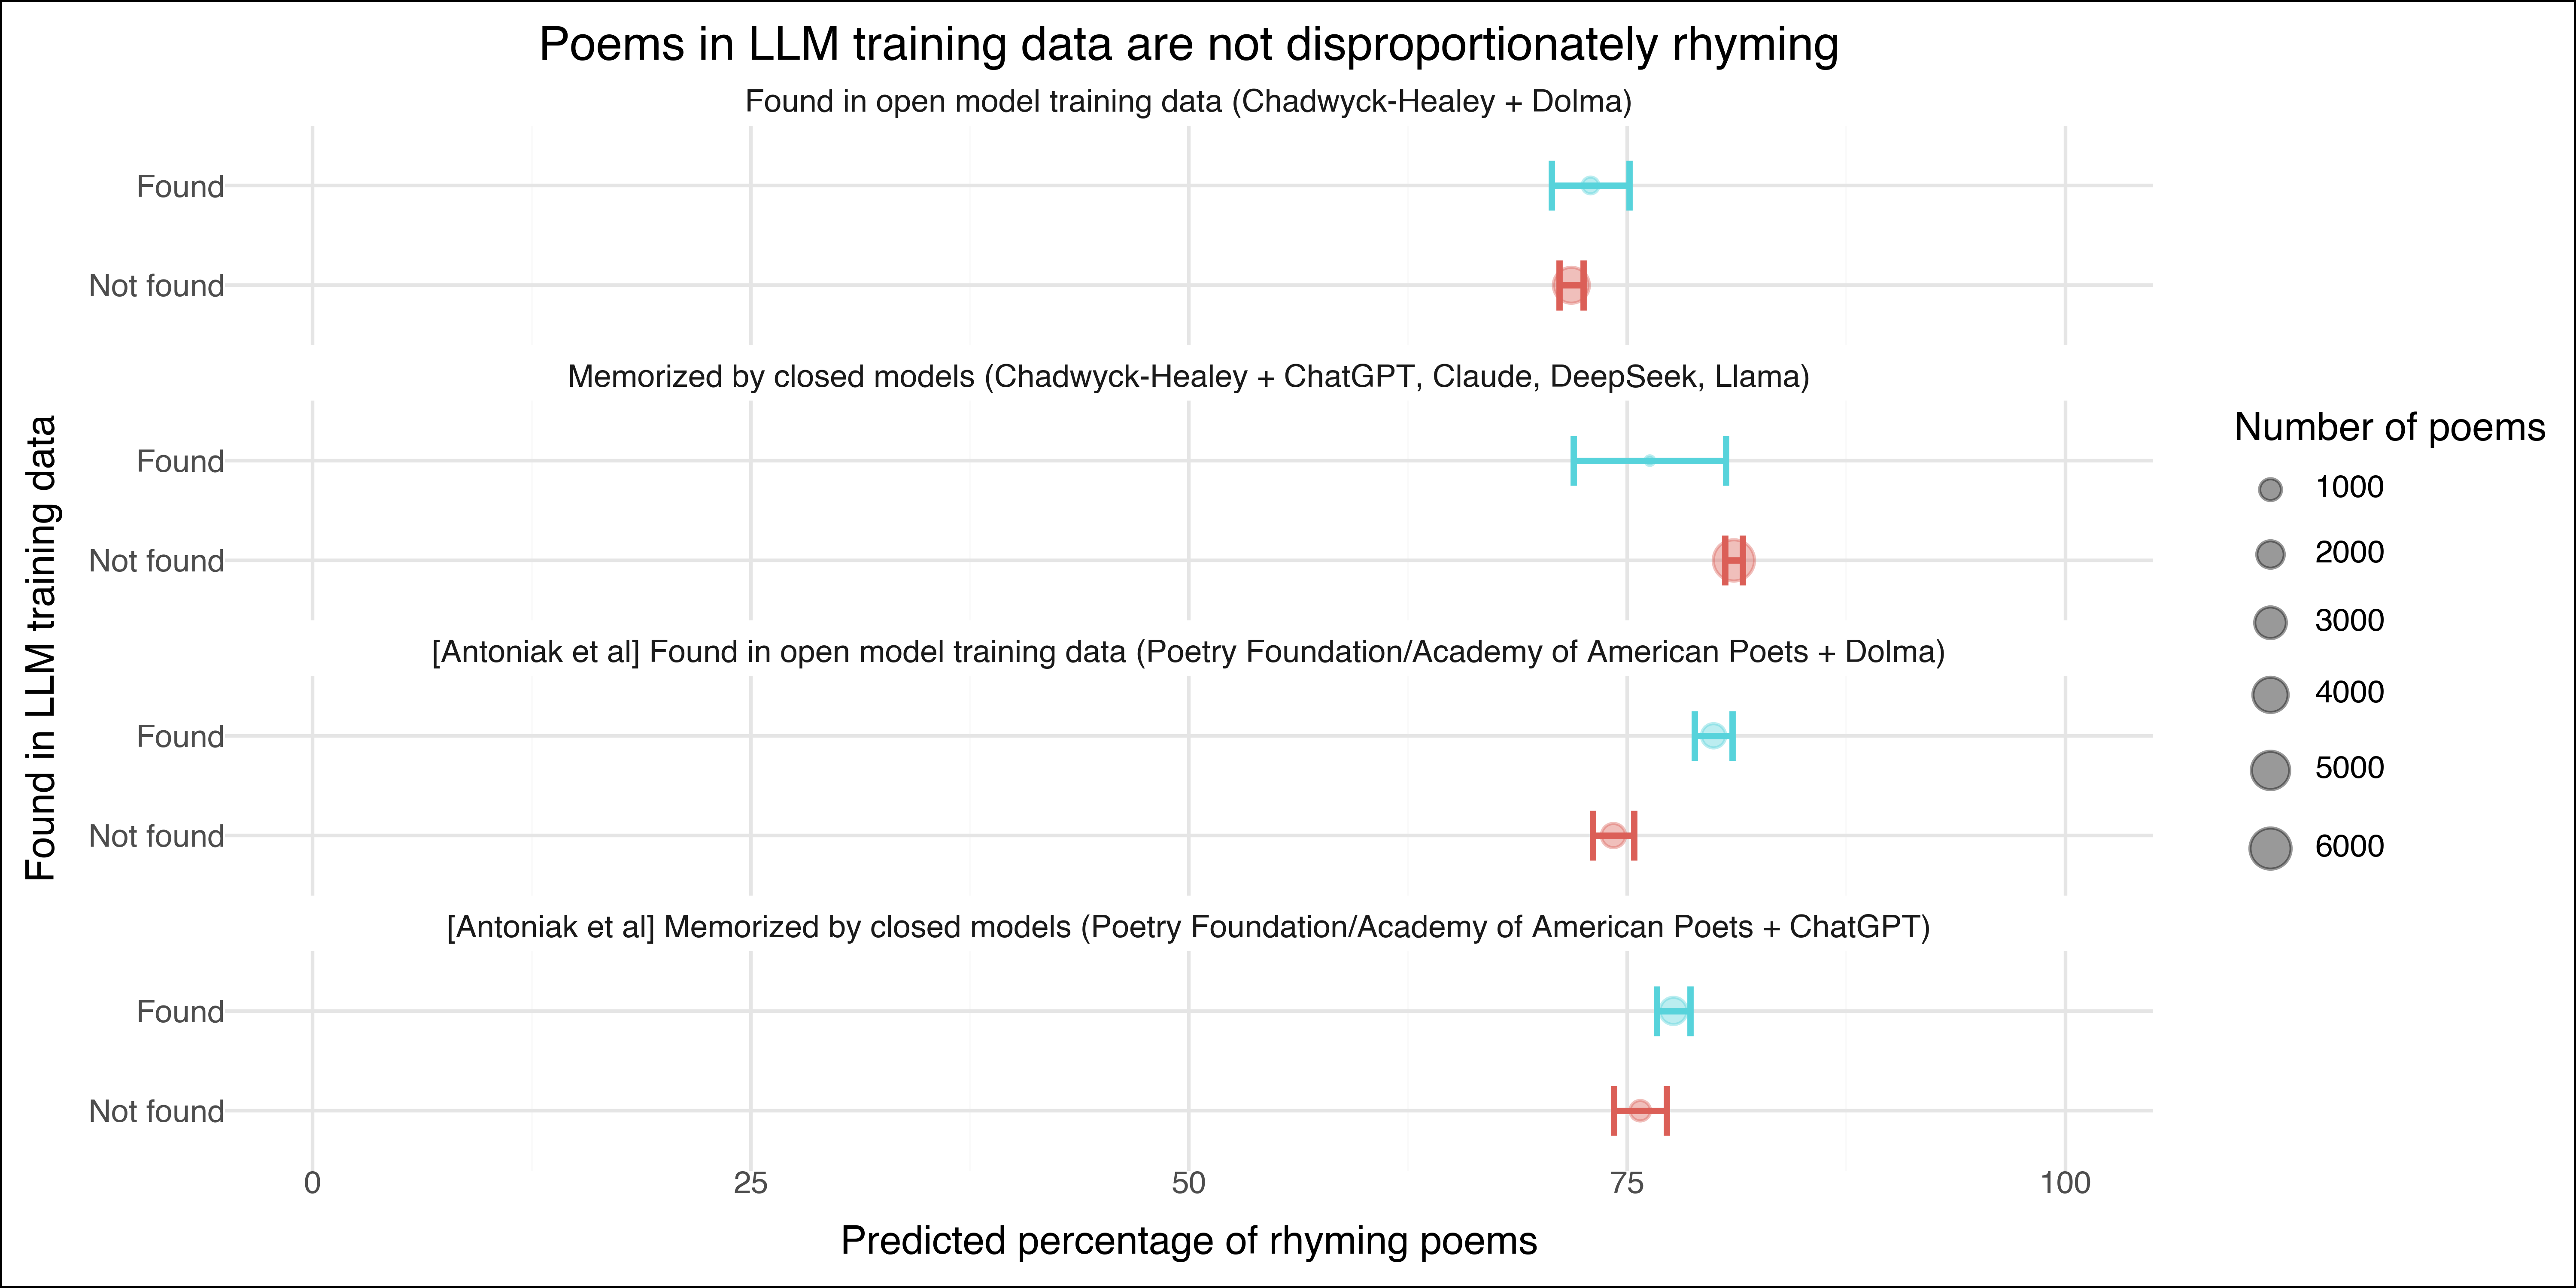

In [7]:
import plotnine as p9
p9.options.figure_size=10,5
p9.options.dpi=300
fig = p9.ggplot(figdf, p9.aes(x='found', y='mean', color='found', fill='found'))
fig += p9.geom_point(p9.aes(size='count'), alpha=.4)
fig += p9.geom_errorbar(
    p9.aes(ymin='mean-stderr', ymax='mean+stderr'),
    size=1
)
fig+= p9.theme_minimal()
fig += p9.facet_wrap('found_source', ncol=1)
fig+= p9.theme(
    # legend_position='bottom',
    plot_background=p9.element_rect(fill='white', color=None),  # Add white background
    panel_background=p9.element_rect(fill='white', color=None)  # Add white background to panels
)
fig += p9.scale_y_continuous(limits=(0,100))
fig+= p9.labs(
    y='Predicted percentage of rhyming poems',
    x='Found in LLM training data',
    color='Found in LLM training data',
    fill='Found in LLM training data',
    title='Poems in LLM training data are not disproportionately rhyming',
    size='Number of poems',
)
fig += p9.guides(color=False, fill=False)
fig += p9.coord_flip()
fig.save('../figures/rhyme_memorization_by_source.png')
fig

In [8]:
compute_all_stat_signif(df_combined, 'found_source', 'found')

,,p_value,effect_size,effect_size_str,mean1,mean2,significant
groupby,comparison,,,,,,
[Antoniak et al] Memorized by closed models (Poetry Foundation/Academy of American Poets + ChatGPT),False vs True,0.3040,0.045147,,75.742574,77.640392,False
[Antoniak et al] Found in open model training data (Poetry Foundation/Academy of American Poets + Dolma),False vs True,0.0004,0.136186,,74.214755,79.927536,True
"Memorized by closed models (Chadwyck-Healey + ChatGPT, Claude, DeepSeek, Llama)",False vs True,0.2431,0.122319,,81.086452,76.288660,False
Found in open model training data (Chadwyck-Healey + Dolma),True vs False,0.6427,0.024309,,72.906404,71.813668,False
